In [18]:
import copy
import json
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from karateclub import Graph2Vec
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib as mpl

In [2]:
f = open('reddit_edges.json')
content = json.load(f)
df = pd.read_csv('reddit_target.csv')

In [3]:
G_list = list(content.values())

In [4]:
Gs = [nx.Graph(i) for i in G_list[0:1000]]
y = list(df.target)[0:1000]

In [5]:
l = list(zip(*(Gs,y)))

In [6]:
l0 = []
l1 = []
for i in l:
    if i[1] == 0:
        l0.append(i)
    else:
        l1.append(i)

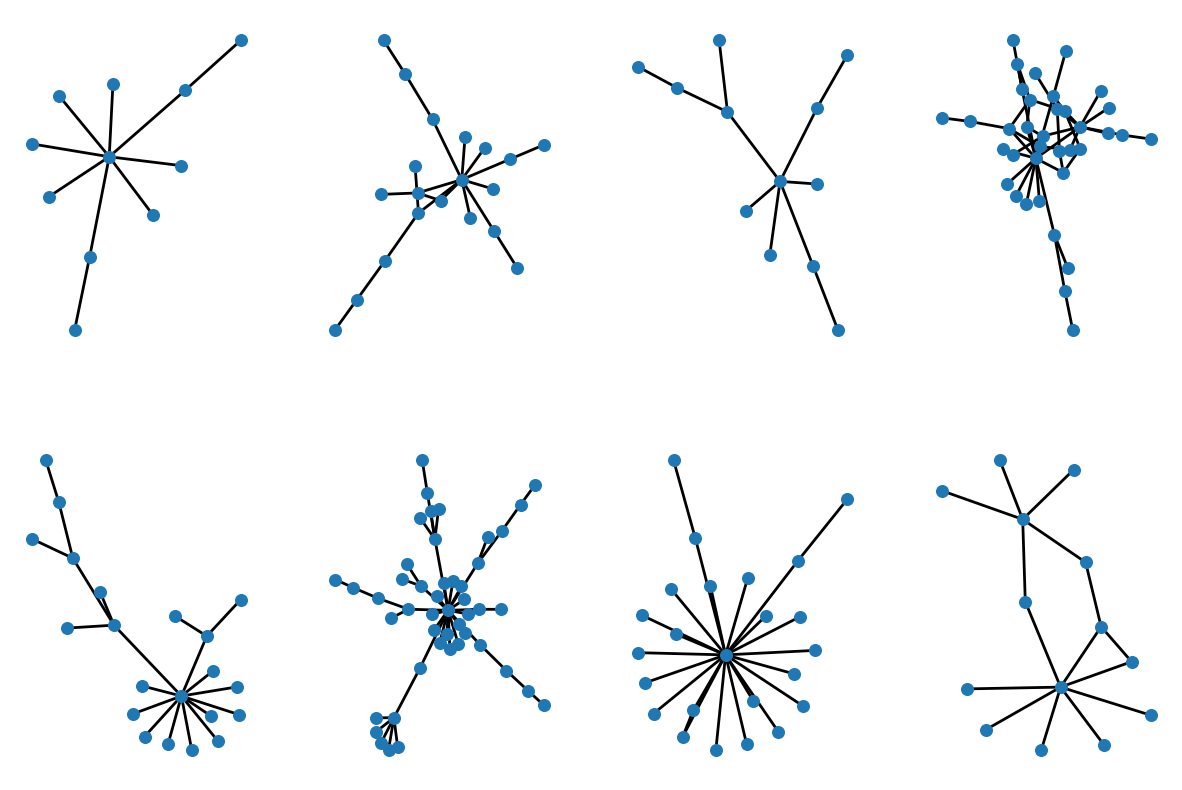

In [7]:
import matplotlib.pyplot as plt
options = {

    'node_size': 70,

    'width': 2,

}
fig, axs = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
subax1 = plt.subplot(241)
nx.draw(l0[0][0],**options)
subax2 = plt.subplot(242)
nx.draw(l0[1][0],**options)
subax3 = plt.subplot(243)
nx.draw(l0[2][0],**options)
subax4 = plt.subplot(244)
nx.draw(l0[3][0],**options)
subax5 = plt.subplot(245)
nx.draw(l0[4][0],**options)
subax6 = plt.subplot(246)
nx.draw(l0[5][0],**options)
subax7 = plt.subplot(247)
nx.draw(l0[6][0],**options)
subax8 = plt.subplot(248)
nx.draw(l0[7][0],**options)


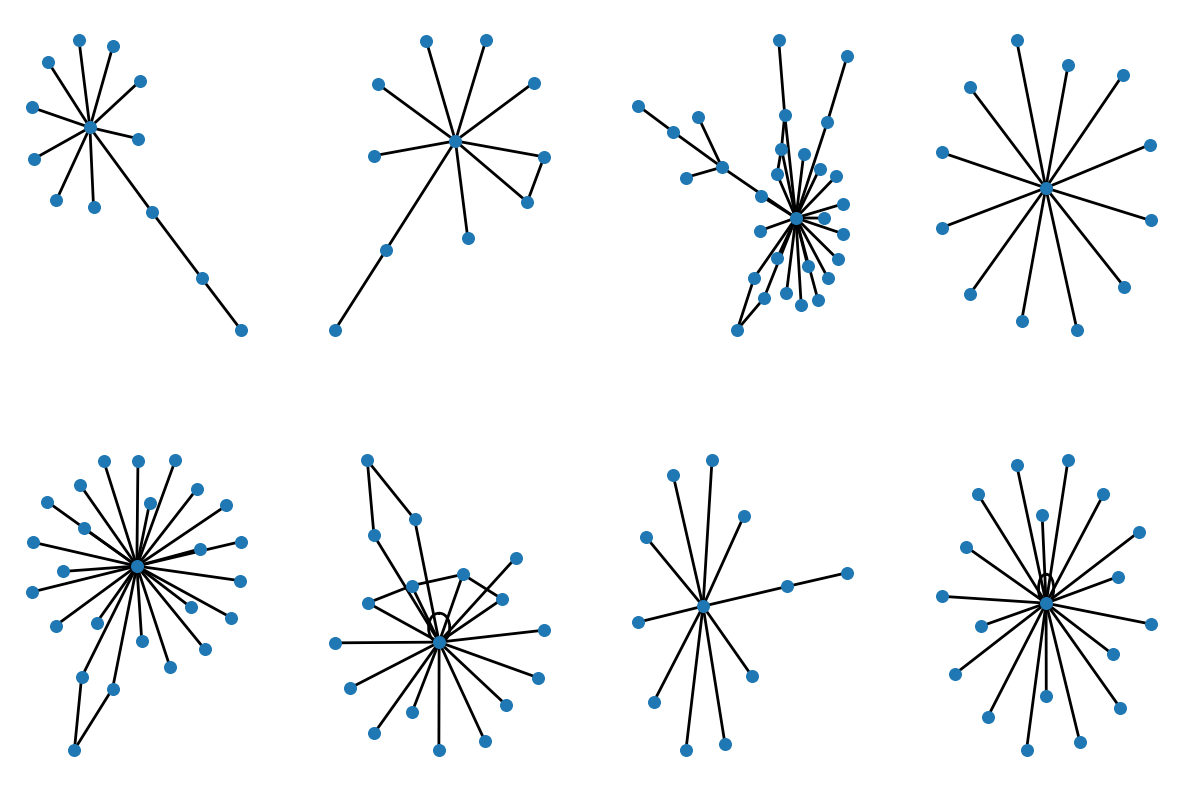

In [8]:
import matplotlib.pyplot as plt
options = {

    'node_size': 70,

    'width': 2,

}
fig, axs = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
subax1 = plt.subplot(241)
nx.draw(l1[0][0],**options)
subax2 = plt.subplot(242)
nx.draw(l1[1][0],**options)
subax3 = plt.subplot(243)
nx.draw(l1[2][0],**options)
subax4 = plt.subplot(244)
nx.draw(l1[3][0],**options)
subax5 = plt.subplot(245)
nx.draw(l1[4][0],**options)
subax6 = plt.subplot(246)
nx.draw(l1[5][0],**options)
subax7 = plt.subplot(247)
nx.draw(l1[6][0],**options)
subax8 = plt.subplot(248)
nx.draw(l1[7][0],**options)

In [10]:
model = Graph2Vec(wl_iterations=100, epochs=100, )
model.fit(Gs)
X = model.get_embedding()

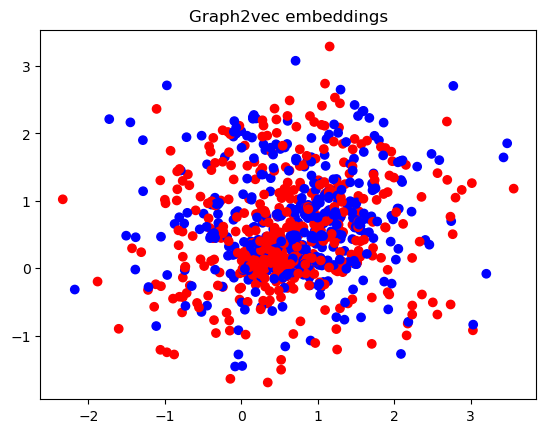

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

cmap = (mpl.colors.ListedColormap(['red','blue'])
        .with_extremes(over='0.25', under='0.75'))


plot = ax.scatter(X[:,0],X[:,1], c=y, cmap=cmap)
# cb = plt.colorbar(plot)
plt.title('Graph2vec embeddings')
plt.show()

In [12]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

AUC: 0.7362


/home/phu/Dropbox/general_backup/anaconda3/envs/gen_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 0, 'False Positive Rate')

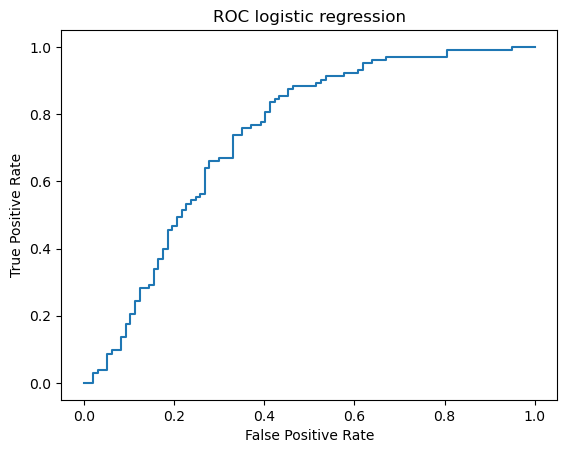

In [14]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  y_hat)

#create ROC curve
plt.plot(fpr,tpr)
plt.title('ROC logistic regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [15]:
y_hat

array([0.33403712, 0.19002242, 0.74466045, 0.63860931, 0.52667165,
       0.49998261, 0.20874046, 0.75380506, 0.42632955, 0.92378596,
       0.82072495, 0.79559224, 0.37836254, 0.81509442, 0.72422019,
       0.53349598, 0.79809009, 0.10403677, 0.76772887, 0.92265829,
       0.30995939, 0.73977106, 0.28296796, 0.26063549, 0.16606917,
       0.90395113, 0.77130935, 0.07946128, 0.87637963, 0.92695603,
       0.81286993, 0.21994988, 0.02840255, 0.75162729, 0.8584493 ,
       0.77332525, 0.31830918, 0.11779662, 0.17054057, 0.78892078,
       0.30874247, 0.89515093, 0.79540238, 0.09527712, 0.16169495,
       0.2107538 , 0.87916023, 0.18085691, 0.36372573, 0.90535722,
       0.65446506, 0.82716632, 0.15901855, 0.23786681, 0.18036681,
       0.81141408, 0.80421064, 0.74148571, 0.32241253, 0.71857266,
       0.80645105, 0.92650174, 0.01293343, 0.88051867, 0.12728109,
       0.40959246, 0.35158698, 0.83386346, 0.93132787, 0.3923184 ,
       0.72814263, 0.3451038 , 0.83220424, 0.89703957, 0.22526

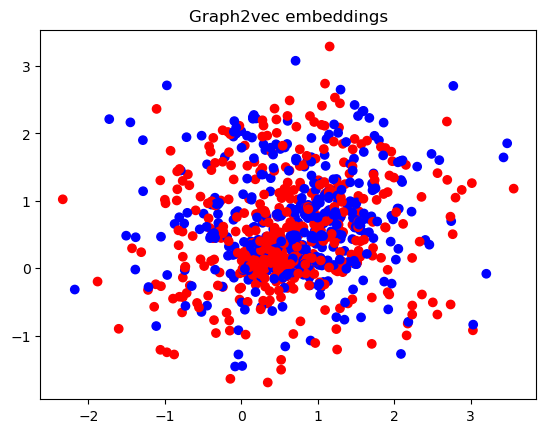

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# cmap = (mpl.colors.ListedColormap(['red','blue'])
#         .with_extremes(over='0.25', under='0.75'))


plot = ax.scatter(X[:,0],X[:,1], c=y, cmap=cmap)
# cb = plt.colorbar(plot)
plt.title('Graph2vec embeddings')
plt.show()

In [19]:
class BiClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.dropout = nn.Dropout(0.2)
        self.hidden1 = nn.Linear(X_train.shape[1], 256)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(256, 256)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(256, 1)
        self.act_output = nn.Sigmoid()
 
    def forward(self, x):
        x = self.dropout(x)
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x
 
model = BiClassifier()
 
# train the model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.00001)
 
n_epochs = 200
batch_size = 5
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []
best_acc = - np.inf

for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    model.train()
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = (y_pred.round() == ybatch).float().mean()
        epoch_loss.append(float(loss))
        epoch_acc.append(float(acc))
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (y_pred.round() == y_test).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")
# compute accuracy
y_pred = model(X_test)
accuracy = (y_pred.round() == y_test).float().mean()
print(f"Accuracy {accuracy}")
 
# make class predictions with the model
predictions = (model(X_test) > 0.5).int()
for i in range(5):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

Epoch 0 validation: Cross-entropy=0.69, Accuracy=54.0%
Epoch 1 validation: Cross-entropy=0.69, Accuracy=60.5%
Epoch 2 validation: Cross-entropy=0.69, Accuracy=63.0%
Epoch 3 validation: Cross-entropy=0.68, Accuracy=63.5%
Epoch 4 validation: Cross-entropy=0.68, Accuracy=68.0%
Epoch 5 validation: Cross-entropy=0.68, Accuracy=68.5%
Epoch 6 validation: Cross-entropy=0.67, Accuracy=70.0%
Epoch 7 validation: Cross-entropy=0.67, Accuracy=70.0%
Epoch 8 validation: Cross-entropy=0.67, Accuracy=70.5%
Epoch 9 validation: Cross-entropy=0.66, Accuracy=70.5%
Epoch 10 validation: Cross-entropy=0.66, Accuracy=71.0%
Epoch 11 validation: Cross-entropy=0.65, Accuracy=71.5%
Epoch 12 validation: Cross-entropy=0.65, Accuracy=72.5%
Epoch 13 validation: Cross-entropy=0.65, Accuracy=73.0%
Epoch 14 validation: Cross-entropy=0.64, Accuracy=73.0%
Epoch 15 validation: Cross-entropy=0.64, Accuracy=72.5%
Epoch 16 validation: Cross-entropy=0.63, Accuracy=73.0%
Epoch 17 validation: Cross-entropy=0.63, Accuracy=72.0%
Ep

Epoch 146 validation: Cross-entropy=0.58, Accuracy=72.0%
Epoch 147 validation: Cross-entropy=0.58, Accuracy=72.0%
Epoch 148 validation: Cross-entropy=0.58, Accuracy=71.5%
Epoch 149 validation: Cross-entropy=0.58, Accuracy=72.0%
Epoch 150 validation: Cross-entropy=0.58, Accuracy=72.0%
Epoch 151 validation: Cross-entropy=0.58, Accuracy=72.0%
Epoch 152 validation: Cross-entropy=0.58, Accuracy=72.0%
Epoch 153 validation: Cross-entropy=0.58, Accuracy=71.5%
Epoch 154 validation: Cross-entropy=0.58, Accuracy=72.0%
Epoch 155 validation: Cross-entropy=0.58, Accuracy=72.0%
Epoch 156 validation: Cross-entropy=0.58, Accuracy=72.0%
Epoch 157 validation: Cross-entropy=0.58, Accuracy=72.0%
Epoch 158 validation: Cross-entropy=0.58, Accuracy=71.5%
Epoch 159 validation: Cross-entropy=0.58, Accuracy=71.5%
Epoch 160 validation: Cross-entropy=0.59, Accuracy=71.5%
Epoch 161 validation: Cross-entropy=0.58, Accuracy=70.5%
Epoch 162 validation: Cross-entropy=0.59, Accuracy=71.5%
Epoch 163 validation: Cross-ent

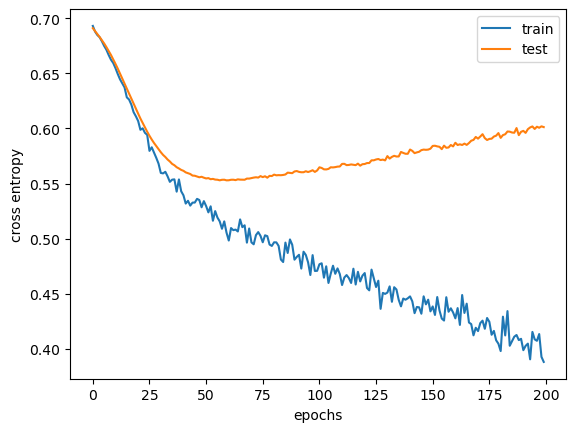

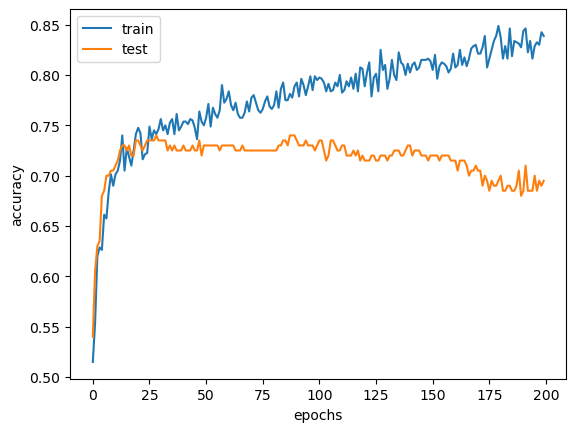

In [20]:
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [21]:
y_pred.reshape(1,-1)[0]

tensor([0.5664, 0.4595, 0.8334, 0.8212, 0.8633, 0.4802, 0.1722, 0.8570, 0.5888,
        0.9530, 0.8691, 0.8633, 0.8311, 0.9011, 0.8251, 0.3643, 0.8696, 0.2844,
        0.9376, 0.7929, 0.2908, 0.4899, 0.5877, 0.2963, 0.1781, 0.6027, 0.8919,
        0.1160, 0.9518, 0.9335, 0.9032, 0.1956, 0.1557, 0.8697, 0.8936, 0.4980,
        0.4662, 0.1246, 0.3456, 0.8944, 0.3119, 0.8962, 0.8875, 0.1399, 0.5138,
        0.1487, 0.8856, 0.4535, 0.3600, 0.8929, 0.5053, 0.9051, 0.1774, 0.2496,
        0.3490, 0.7704, 0.7453, 0.4356, 0.8390, 0.7031, 0.8818, 0.8008, 0.1625,
        0.9057, 0.1431, 0.2630, 0.4066, 0.8842, 0.8510, 0.4806, 0.6977, 0.4100,
        0.9408, 0.9576, 0.7743, 0.8645, 0.1904, 0.5237, 0.7761, 0.8578, 0.8901,
        0.8613, 0.9466, 0.1458, 0.5510, 0.7927, 0.1749, 0.5289, 0.9044, 0.4091,
        0.0710, 0.0789, 0.3059, 0.3671, 0.8236, 0.8578, 0.7864, 0.8934, 0.8917,
        0.3532, 0.8812, 0.1053, 0.5064, 0.4745, 0.2986, 0.7302, 0.9033, 0.5719,
        0.2457, 0.4631, 0.7736, 0.9457, 

Text(0.5, 0, 'False Positive Rate')

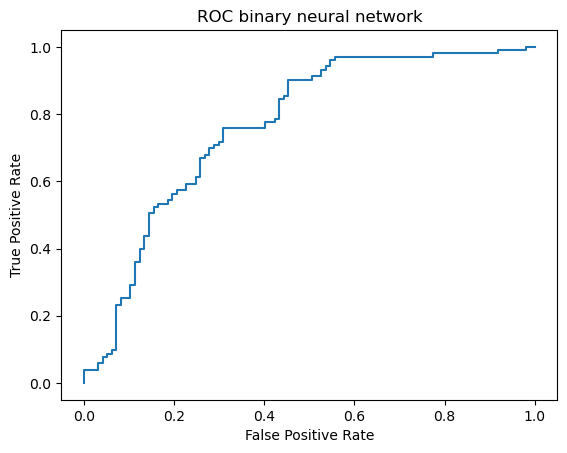

In [22]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred.reshape(1,-1).flatten().detach().numpy() )

#create ROC curve
plt.plot(fpr,tpr)
plt.title('ROC binary neural network')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [23]:
y_pred.reshape(1,-1).flatten().detach().numpy() 

array([0.566427  , 0.45947424, 0.8334102 , 0.8212139 , 0.8632876 ,
       0.48022908, 0.17215171, 0.8569534 , 0.5887626 , 0.9529869 ,
       0.86910766, 0.86327356, 0.83108956, 0.9010626 , 0.82510036,
       0.36431214, 0.86961704, 0.28440186, 0.9376145 , 0.79287106,
       0.2908455 , 0.48991862, 0.58769095, 0.29631755, 0.1780504 ,
       0.60269326, 0.8919081 , 0.11598524, 0.9518048 , 0.9334842 ,
       0.903175  , 0.19564055, 0.15573524, 0.86969334, 0.89362013,
       0.4980469 , 0.46619958, 0.12464324, 0.34555116, 0.89435184,
       0.31190503, 0.8961726 , 0.8875027 , 0.13989642, 0.5138448 ,
       0.14871001, 0.88557553, 0.45352948, 0.35997257, 0.89291936,
       0.5053201 , 0.905088  , 0.17737854, 0.24955839, 0.3489853 ,
       0.77039474, 0.7452847 , 0.43556544, 0.8390469 , 0.7031096 ,
       0.8818351 , 0.80082816, 0.1625491 , 0.9057016 , 0.14307266,
       0.26303574, 0.40663987, 0.88423795, 0.850978  , 0.48057127,
       0.6976677 , 0.41003978, 0.94082487, 0.95763886, 0.77425

In [24]:
auc = roc_auc_score(y_test, y_pred.reshape(1,-1).flatten().detach().numpy())
print('AUC: {:.4f}'.format(auc))

AUC: 0.7667
